In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.datasets import make_gaussian_quantiles, make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.inspection import DecisionBoundaryDisplay

# Configuration options
num_samples_total = 500
gaussian_mean = (0,0)
num_classes_total = 2
num_features_total = 2
random_state = 47
noise = 0.25

In [2]:
# Generate data
X, y = make_moons(n_samples=num_samples_total, noise=noise, random_state=random_state)
X = X - 0.5

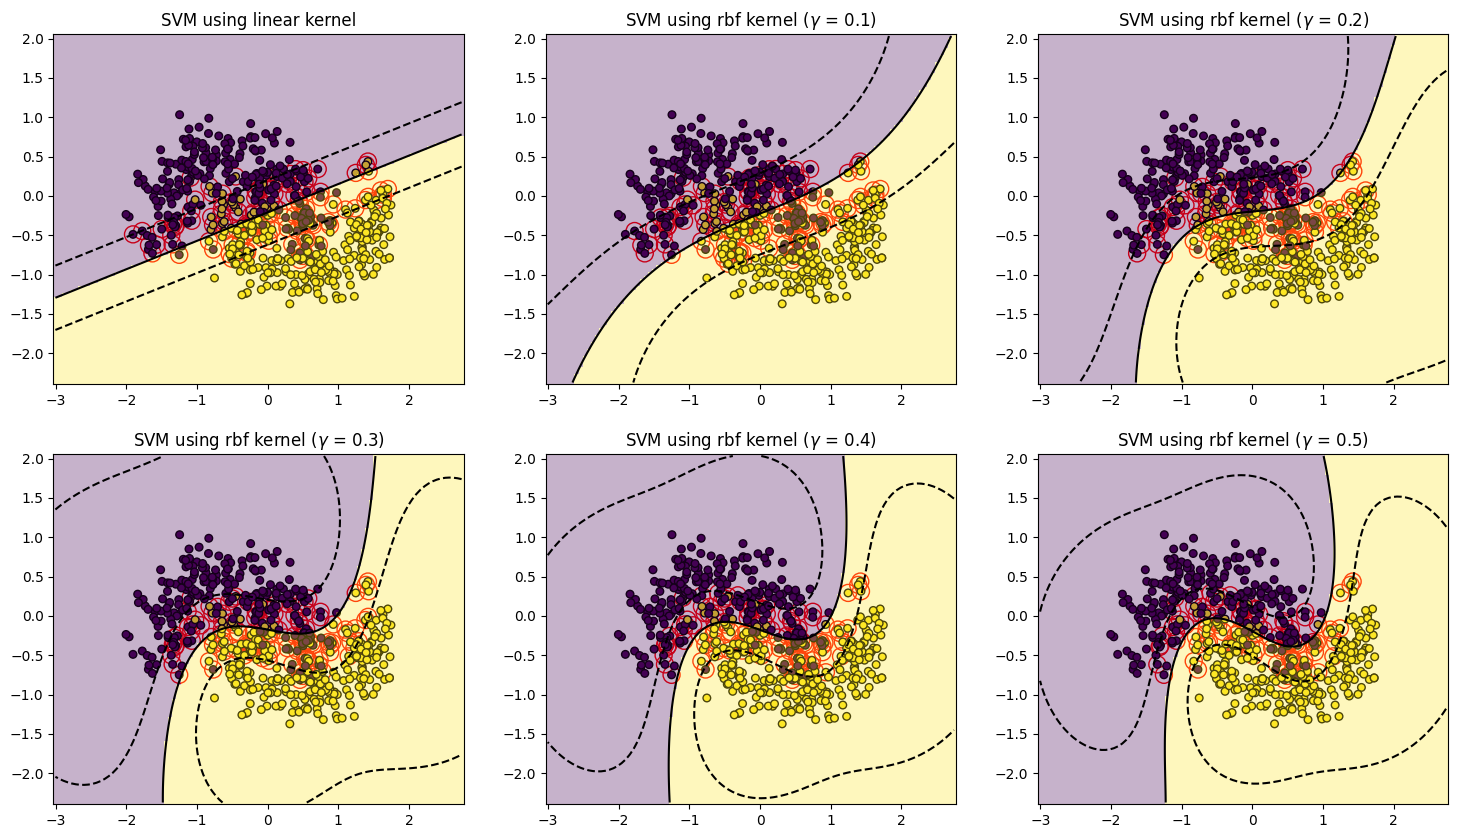

In [3]:
# Plot decision boundaries of SVM using linear and RBF kernels
test_size = 0.25
kernel = ['linear','rbf','rbf','rbf','rbf','rbf']
gamma = [0,.1,.2,.3,.4,.5]
cm_list = []
f1_list = []

fig, axs = plt.subplots(2, 3, figsize=(18,10))
axs = axs.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

for i in range(len(kernel)):
    
    svm = SVC(random_state=random_state, kernel=kernel[i], gamma=gamma[i])
    svm = svm.fit(X_train, y_train)
    predictions = svm.predict(X_test)
    common_params = {"estimator": svm, "X": X, "ax": axs[i]}
    cm = confusion_matrix(y_test, predictions, labels=svm.classes_)
    f1 = f1_score(y_test, predictions)
    cm_list.append(cm)
    f1_list.append(f1)

    axs[i].scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=150,
        facecolors="none",
        edgecolors="r",
    )
    axs[i].scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )
    
    axs[i].set_title('SVM using '+kernel[i]+' kernel'+' (' + r'$\gamma$' + ' = ' + str(gamma[i])+')')
    axs[0].set_title('SVM using '+kernel[0]+' kernel')

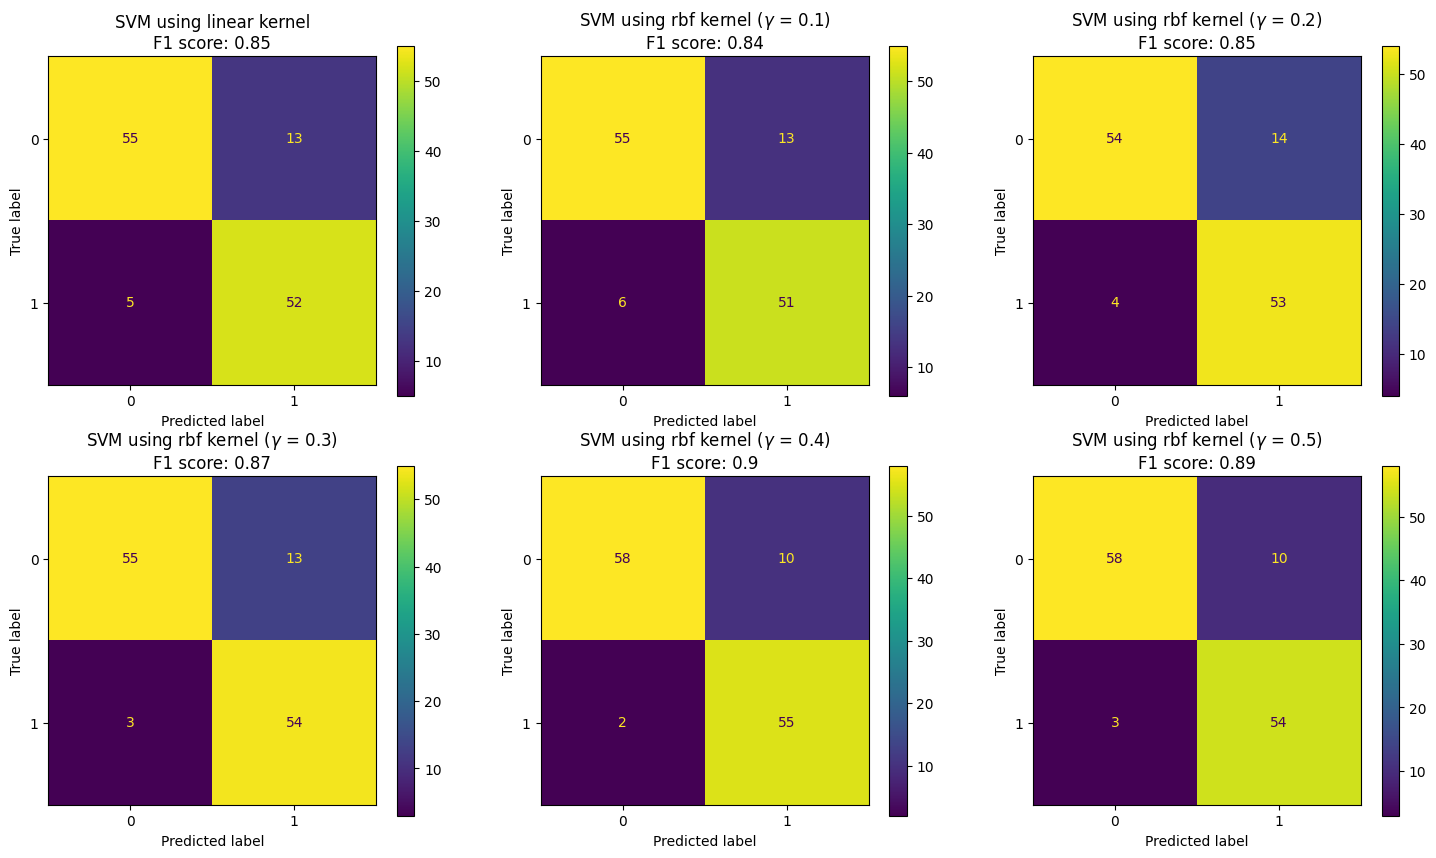

In [4]:
# Compare confusion matrices of SVM using linear and RBF kernels
fig, axs = plt.subplots(2, 3, figsize=(18,10))
axs = axs.ravel()

for i in range(len(cm_list)):

    ConfusionMatrixDisplay(confusion_matrix = cm_list[i], display_labels=svm.classes_).plot(ax = axs[i])
    axs[i].set_title('SVM using '+kernel[i]+' kernel'+' (' + r'$\gamma$' + ' = ' + str(gamma[i])+')' + '\nF1 score: ' + str(round(f1_list[i],2)))
    axs[0].set_title('SVM using '+kernel[0]+' kernel'+'\nF1 score: ' + str(round(f1_list[0],2)))